# Setup Pipeline -  (build model and load weights)

In [1]:
# np_format = {}
# float_formatter = lambda x: "%10.4f" % x
# int_formatter   = lambda x: "%10d" % x
# np_format['float'] = float_formatter
# np_format['int']   = int_formatter
# np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
# import matplotlib.pyplot as plt
# from   mpl_toolkits.mplot3d import Axes3D
# from importlib import reload
# reload(plt)
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys,os, pprint, pickle
pp = pprint.PrettyPrinter(indent=2, width=100)
print('Current working dir: ', os.getcwd())
if '..' not in sys.path:
    print("appending '..' to sys.path")
    sys.path.append('..')
    
import numpy as np
import mrcnn.utils     as utils
import mrcnn.visualize as visualize
import mrcnn.visualize_2 as vis2 
import mrcnn.prep_notebook as prep
from mrcnn.prep_notebook import build_fcn_evaluate_pipeline, run_mrcnn_evaluate_pipeline, get_evaluate_batch
from mrcnn.visualize     import display_training_batch
from mrcnn.newshapes     import prep_newshape_dataset
from mrcnn.utils         import trim_zeros, compute_overlaps
import mrcnn.calculate_map as cmap


Current working dir:  /home/kbardool/git_projs/mrcnn3/notebooks
appending '..' to sys.path


Using TensorFlow backend.


 Init Image Class - Possible Object Choices:  {'sun': 1, 'truck': 3, 'car': 3, 'person': 5, 'tree': 5, 'airplane': 3, 'building': 3, 'cloud': 3}
 Init Image Class - Custom Color Keys      :  ['sun', 'person', 'ground', 'tree', 'sky', 'cloud']
 Init Image Class - Object Priority List   :  ['building', 'tree', 'car']
 Init Image Class - BUILD_MAX_TRIES        :  7
 Init Image Class - person_car_gap         :  10


In [3]:
##------------------------------------------------------------------------------------
## Parse command line arguments
##------------------------------------------------------------------------------------
parser = utils.command_line_parser()
input_parms  =" --batch_size     1  "
input_parms +=" --dataset        newshapes2"
input_parms +=" --mrcnn_logs_dir train_mrcnn "
# input_parms +=" --fcn_logs_dir   train_fcn8_bce " 
input_parms +=" --fcn_logs_dir   train_fcn8L2_BCE1 "
input_parms +=" --mrcnn_model    /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/mrcnn_0020.h5 "
input_parms +=" --fcn_model      last "
input_parms +=" --fcn_layer      all"
input_parms +=" --fcn_arch       fcn8L2 " 
input_parms +=" --sysout         screen "
input_parms +=" --fcn_losses     fcn_BCE_loss "
input_parms +=" --fcn_bce_loss_method  1"
input_parms +=" --scale_factor    1"
eval_method = '1'
input_parms +=" --evaluate_method "+eval_method



args = parser.parse_args(input_parms.split())
utils.display_input_parms(args)


   Arguments passed :
   --------------------
   batch_size                     1
   coco_classes                   None
   dataset                        newshapes2
   epochs                         1
   evaluate_method                1
   fcn_arch                       FCN8L2
   fcn_bce_loss_class             0
   fcn_bce_loss_method            1
   fcn_layers                     ['all']
   fcn_logs_dir                   train_fcn8L2_BCE1
   fcn_losses                     ['fcn_BCE_loss']
   fcn_model                      last
   last_epoch                     0
   lr                             0.001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir                 train_mrcnn
   mrcnn_model                    /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/mrcnn_0020.h5
   new_log_folder                 False
   opt                            ADAGRAD
   scale_factor                   1
   steps_in_epo

In [19]:
mrcnn_model, fcn_model = prep.build_fcn_evaluate_pipeline_newshapes(args = args,verbose = 0)

MODE IS: evaluate

--> Execution started at: 04-01-2019 @ 08:24:54
    Tensorflow Version: 1.8.0   Keras Version : 2.1.6 
    Build_mrcnn_inference_pipeline_newshapes MODE is : evaluate

   Arguments passed :
   --------------------
   batch_size                     1
   coco_classes                   None
   dataset                        newshapes2
   epochs                         1
   evaluate_method                1
   fcn_arch                       FCN8L2
   fcn_bce_loss_class             0
   fcn_bce_loss_method            1
   fcn_layers                     ['all']
   fcn_logs_dir                   train_fcn8L2_BCE1
   fcn_losses                     ['fcn_BCE_loss']
   fcn_model                      last
   last_epoch                     0
   lr                             0.001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir                 train_mrcnn
   mrcnn_model                    /home/kbardool/models_new

    Weights file loaded: /home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190318T0000/mrcnn_0020.h5 
MRCNN  MODEL Load weight file COMPLETE 
>>> Initialize Paths
 Linx  Linux
>>> Initialize ModelBase model 
   Mode      :  inference
   Model dir :  /home/kbardool/models_newshapes2/train_fcn8L2_BCE1
>>> ModelBase initialiation complete
>>> Initialize FCN model, mode:  inference architecture:  FCN8L2
    arch set to FCN8 - with L2 Regularization
<function fcn8_l2_graph at 0x7f1f8290af28>


---------------------------------------------------
 Build FCN Model -  Arch:  FCN8L2  mode:  inference
---------------------------------------------------

------------------------------------------------------
>>> FCN8L2 Layer With Regularization - mode: inference
------------------------------------------------------

 
---------------------------------------------
>>> FCN Scoring Graph  - mode: inference
---------------------------------------------

 
-------------------------------------------

###  Print some information about the model 

In [ ]:
# print("\nConfiguration Parameters:")
# print("-------------------------")
# for a in dir(fcn_config2):
#     if not a.startswith("__") and not callable(getattr(fcn_config2, a)):
#         print("{:30} {}    {}".format(a, getattr(fcn_config2, a) == getattr(fcn_model.config, a), getattr(fcn_config2, a), getattr(fcn_model.config, a) ))
# print("\n")

# mrcnn_model.config.display()

## Load weights

In [5]:
## BCE with original heatmap layer                 
# FCN_DIR_WEIGHTS =  'F:/models_newshapes/train_fcn8L2_BCE/fcn20181224T0000'  
# FCN_DIR_WEIGHTS =  '/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20181224T0000' 
# fcn_files   = ['fcn_0001.h5', 'fcn_0150.h5', 'fcn_0346.h5', 'fcn_0421.h5',
#                'fcn_0450.h5', 'fcn_0521.h5', 'fcn_0687.h5', 'fcn_0793.h5',
#                'fcn_0821.h5', 'fcn_0940.h5', 'fcn_1012.h5', 'fcn_1127.h5',
#                'fcn_1644.h5', 'fcn_1776.h5', 'fcn_1848.h5', 'fcn_2017.h5','fcn_2084.h5']


## BCE with new heatmap layer                 
# FCN_DIR_WEIGHTS =  'F:/models_newshapes/train_fcn8L2_BCE/fcn20180208T0000'  
# FCN_DIR_WEIGHTS =  '/home/kbardool/models_newshapes/train_fcn8L2_BCE/fcn20190208T0000' 
# fcn_files   = ['initialization', 
#            'fcn_0001.h5', 'fcn_0003.h5', 'fcn_0005.h5', 'fcn_0009.h5',
#            'fcn_0012.h5', 'fcn_0020.h5', 'fcn_0023.h5', 'fcn_0027.h5',
#            'fcn_0033.h5', 'fcn_0047.h5', 'fcn_0070.h5', 'fcn_0080.h5',
#            'fcn_0101.h5', 'fcn_0106.h5', 'fcn_0112.h5', 'fcn_0124.h5',
#            'fcn_0138.h5', 'fcn_0144.h5', 'fcn_0161.h5', 'fcn_0171.h5', 'fcn_0181.h5']

# FCN_DIR_WEIGHTS =  '/home/kbardool/models_newshapes/train_fcn8L2_BCE2/fcn20190131T0000' 
# fcn_files   = ['fcn_0001.h5', 'fcn_0022.h5', 'fcn_0057.h5', 'fcn_0092.h5',
#                'fcn_0101.h5', 'fcn_0220.h5', 'fcn_0290.h5', 'fcn_0304.h5',
#                'fcn_0372.h5', 'fcn_0423.h5', 'fcn_0500.h5', 'fcn_0530.h5',
#                'fcn_0578.h5', 'fcn_0648.h5']

# FCN_DIR_WEIGHTS =  'F:/models_newshapes/train_fcn8L2_BCE2/fcn20190131T0000'  
# fcn_files   = ['fcn_0500.h5']

FCN_DIR_WEIGHTS   = "/home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000"
fcn_files  = ['fcn_0001.h5', 'fcn_0002.h5', 'fcn_0003.h5', 'fcn_0004.h5', 
              'fcn_0005.h5', 'fcn_0006.h5', 'fcn_0008.h5', 'fcn_0009.h5', 
              'fcn_0012.h5', 'fcn_0016.h5', 'fcn_0018.h5', 'fcn_0019.h5', 
              'fcn_0021.h5', 'fcn_0022.h5', 'fcn_0023.h5', 'fcn_0024.h5', 
              'fcn_0033.h5', 'fcn_0039.h5', 'fcn_0042.h5', 'fcn_0044.h5', 
              'fcn_0077.h5', 'fcn_0089.h5']


In [16]:
FILE_IDX = 10
weights_path = os.path.join(FCN_DIR_WEIGHTS  , fcn_files[FILE_IDX])
print("Loading weights ", weights_path)
fcn_model.load_model_weights(weights_path)

Loading weights  /home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0018.h5
-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0018.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0018.h5
    Weights file loaded: /home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0018.h5 
FCN  MODEL Load weight file COMPLETE 


# Build test datasets

In [6]:
# del dataset_train, dataset_val, train_generator, val_generator
# dataset_test , test_generator   = prep_newshape_dataset( mrcnn_model.config,  1000, generator=True)
# with open('newshapes_dataset_1000_B.pkl', 'wb') as outfile:
#     pickle.dump(dataset_test, outfile)
## -- OR --

# with open("E:\\git_projs\\MRCNN3\\train_newshapes\\newshapes_test_dataset_1000.pkl", 'rb') as infile:
# with open("E:\\git_projs\\MRCNN3\\train_newshapes\\newshapes_test_dataset_1000_B.pkl", 'rb') as infile:
with open(os.path.join(mrcnn_model.config.DIR_DATASET,"newshapes2_test_dataset_1000_A.pkl"), 'rb') as infile:
    
    dataset_test = pickle.load(infile)

In [7]:
dataset_test.display_active_class_info()
print("Testing Dataset Image Count: {}".format(len(dataset_test.image_ids)))
print("Testing Dataset Class Count: {}".format(dataset_test.num_classes))
print(len(dataset_test.image_ids))    
class_names = dataset_test.class_names

[1, 2, 3, 4, 5, 6, 7, 8]
internal_class:  1 ext_cls: 1 name: None - person
internal_class:  2 ext_cls: 2 name: None - car
internal_class:  3 ext_cls: 3 name: None - sun
internal_class:  4 ext_cls: 4 name: None - building
internal_class:  5 ext_cls: 5 name: None - tree
internal_class:  6 ext_cls: 6 name: None - cloud
internal_class:  7 ext_cls: 7 name: None - airplane
internal_class:  8 ext_cls: 8 name: None - truck
Testing Dataset Image Count: 1000
Testing Dataset Class Count: 9
1000


###  Display some images from dataset

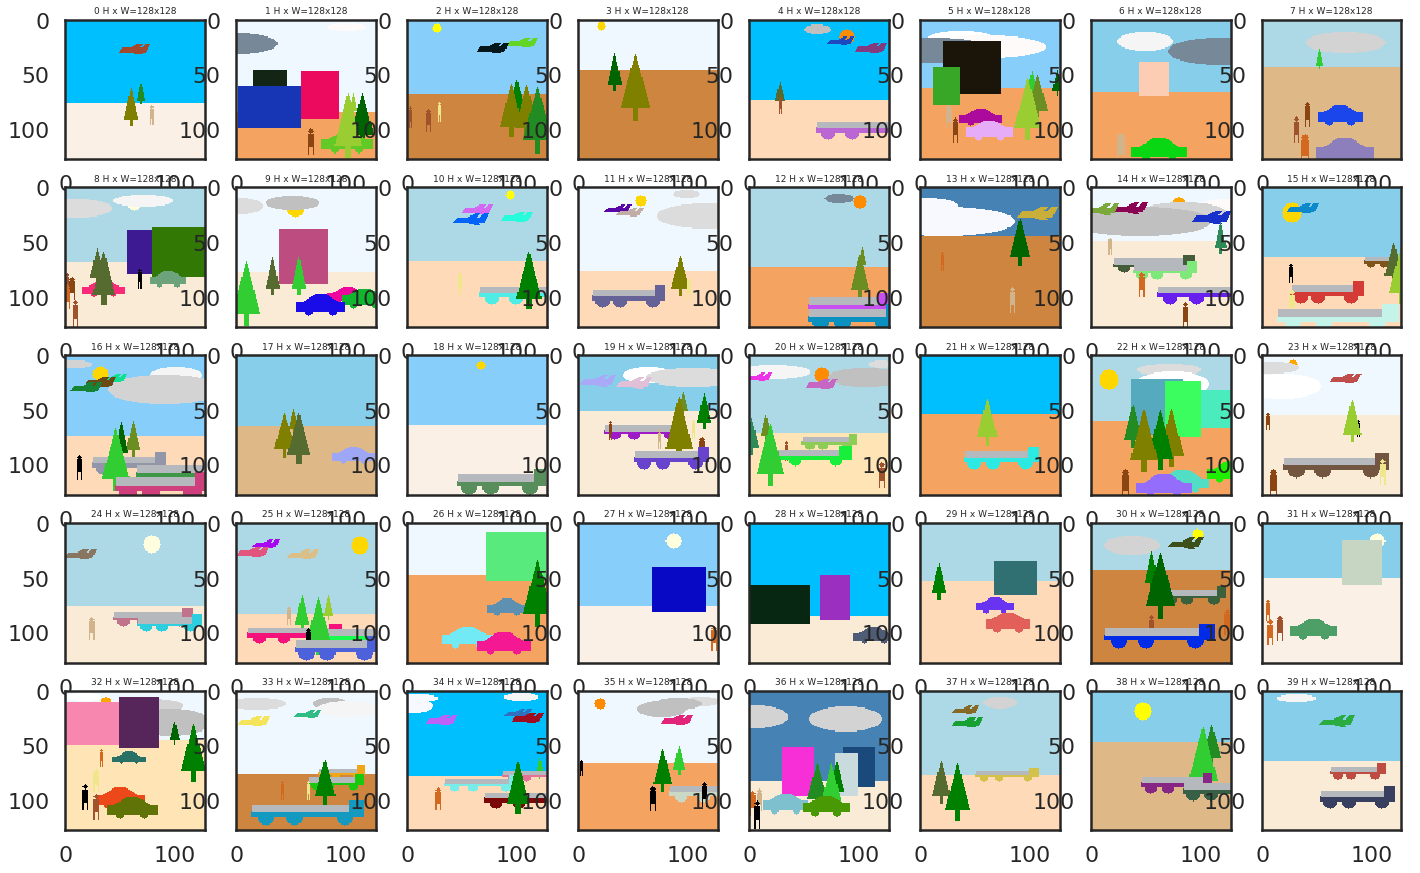

In [8]:
image_list = list(range(0,40))
image_titles = [str(i) for i in image_list]
images = prep.get_image_batch(dataset_test, image_list)
visualize.display_images(images, titles = image_titles, cols = 8, width = 24)

## Display Images

### Load using next(generator)

In [ ]:
test_batch_x, _ = next(test_generator)
display_training_batch(dataset_test, test_batch_x)
# dataset_train.display_annotation_info(0)

### Load a specific image using image_id -Display image with Ground Truth bounding boxes and masks

In [ ]:
IMAGE_LIST = [33]
# del images, train_batch_x
# train_batch_x = get_evaluate_batch(dataset_train, mrcnn_model.config, generator = train_generator )
eval_batch = get_evaluate_batch(dataset_test, mrcnn_model.config, image_ids = IMAGE_LIST)

# train_batch_x, _ =  data_gen_simulate(dataset_train, mrcnn_model.config, IMAGE_LIST)
# visualize.display_training_batch(dataset_train, train_batch_x)
# dataset_train.display_annotation_info(IMAGE_LIST)
 

# Run FCN evaluation pipeline

##  Run FCN detection pipeline on first image

### Load an image using `get_evaluate_batch()`

image id :  27
 Image_id    :  27  Reference:  [('sun', (255.0, 255.0, 224.0), (87, 16, 7, 7)), ('building', (7.0, 9.0, 197.0), (92, 60, 24, 20)), ('person', (210.0, 105.0, 30.0), (124, 107, 2, 11))] Coco Id: 27
 Image meta  :  [ 27 128 128   3   0   0 128 128]
 Class ids   :  (3,)    [3 4 1]
 Class Names :  ['sun', 'building', 'person']


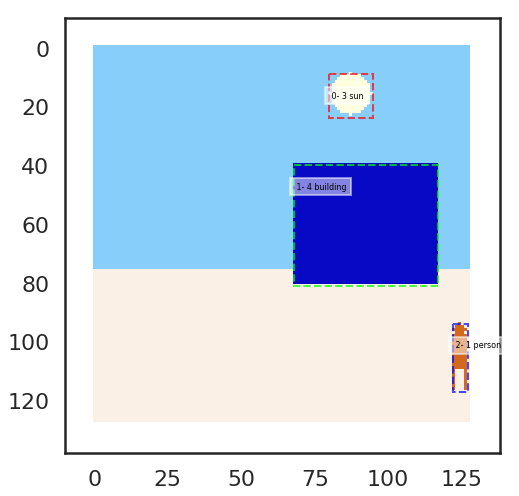

In [9]:
# eval_batch = get_evaluate_batch(dataset_test, mrcnn_model.config, generator = test_generator, display = True)
eval_batch = get_evaluate_batch(dataset_test, mrcnn_model.config, image_ids = [27], display = True)
# eval_batch = get_evaluate_batch(dataset_test, mrcnn_model.config, display = True)

###  Run `fcn_model.evaluate()`

In [18]:
fcn_results = fcn_model.evaluate(mrcnn_model, eval_batch, verbose = 0)
print(' Complete')


 --------------------------------------------------------------------------------------
 class id :   1     class avg score: 0.9054    GT boxes :   1
 --------------------------------------------------------------------------------------

  TP Boxes: 	 box 			 orig_score 	 noise 		 new_score
  --------------------------------------------------------------------------------
  0  	 [   94.0000   122.0000   117.0000   127.0000] 		 [    0.9054] 	 [   -0.0008] 	 [    0.9046]

  FP Boxes: 	 box 			 orig_score 	 noise 		 new_score
  --------------------------------------------------------------------------------
  0  	 [   11.0000     1.0000    34.0000     6.0000] 		 [    0.9054] 	 [   -0.0004] 	 [    0.9050]

 --------------------------------------------------------------------------------------
 class id :   3     class avg score: 0.9475    GT boxes :   1
 --------------------------------------------------------------------------------------

  TP Boxes: 	 box 			 orig_score 	 noise 		 new

In [19]:
fcn_results[0].keys()
for i, r in enumerate(fcn_results):
    print('\n output ', i, '  ',sorted(r.keys()))
    for key in sorted(r):
        print(key.ljust(20), r[key].shape)        


 output  0    ['class_ids', 'detection_ind', 'detections', 'fcn_hm', 'fcn_hm_scores', 'fcn_scores', 'fcn_scores_by_class', 'fcn_sm', 'gt_bboxes', 'gt_class_ids', 'image', 'image_meta', 'molded_image', 'molded_rois', 'pr_hm', 'pr_hm_scores', 'pr_scores', 'pr_scores_by_class', 'rois', 'scores']
class_ids            (6,)
detection_ind        (6,)
detections           (64, 7)
fcn_hm               (128, 128, 9)
fcn_hm_scores        (9, 64, 24)
fcn_scores           (6, 24)
fcn_scores_by_class  (9, 64, 24)
fcn_sm               (128, 128, 9)
gt_bboxes            (100, 4)
gt_class_ids         (100,)
image                (128, 128, 3)
image_meta           (17,)
molded_image         (128, 128, 3)
molded_rois          (6, 4)
pr_hm                (128, 128, 9)
pr_hm_scores         (9, 64, 24)
pr_scores            (6, 24)
pr_scores_by_class   (9, 64, 24)
rois                 (6, 4)
scores               (6,)


In [22]:
# r = fcn_results[0]

# zero_ix = np.where(r['gt_class_ids']== 0)[0]

# if zero_ix.shape[0] > 0 :
#     N = zero_ix[0] 
#     print('-----------------------------------------------------------')
#     print(' There are non zero items in the gt_class_id nparray  :', zero_ix.shape)
#     for i in zero_ix:
#         print(r['gt_bboxes'][i] , r['gt_class_ids'][i])
#     print('-----------------------------------------------------------')
# else:
#     N = r['gt_class_ids'].shape[0]
# #    print('zero_ix:', zero_ix.shape, 'N :', N)  

### Display FCN detections

In [13]:
np_format = {}
float_formatter = lambda x: "%10.4f" % x
int_formatter   = lambda x: "%10d" % x
np_format['float'] = float_formatter
np_format['int']   = int_formatter
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)


min:    0.0000   mean:   0.0029   max:    1.0000   stddev:   0.0461   sum:  47.4112 
min:   -2.2196   mean:  -0.5504   max:    0.4814   stddev:   0.2522   sum:-9017.2939 


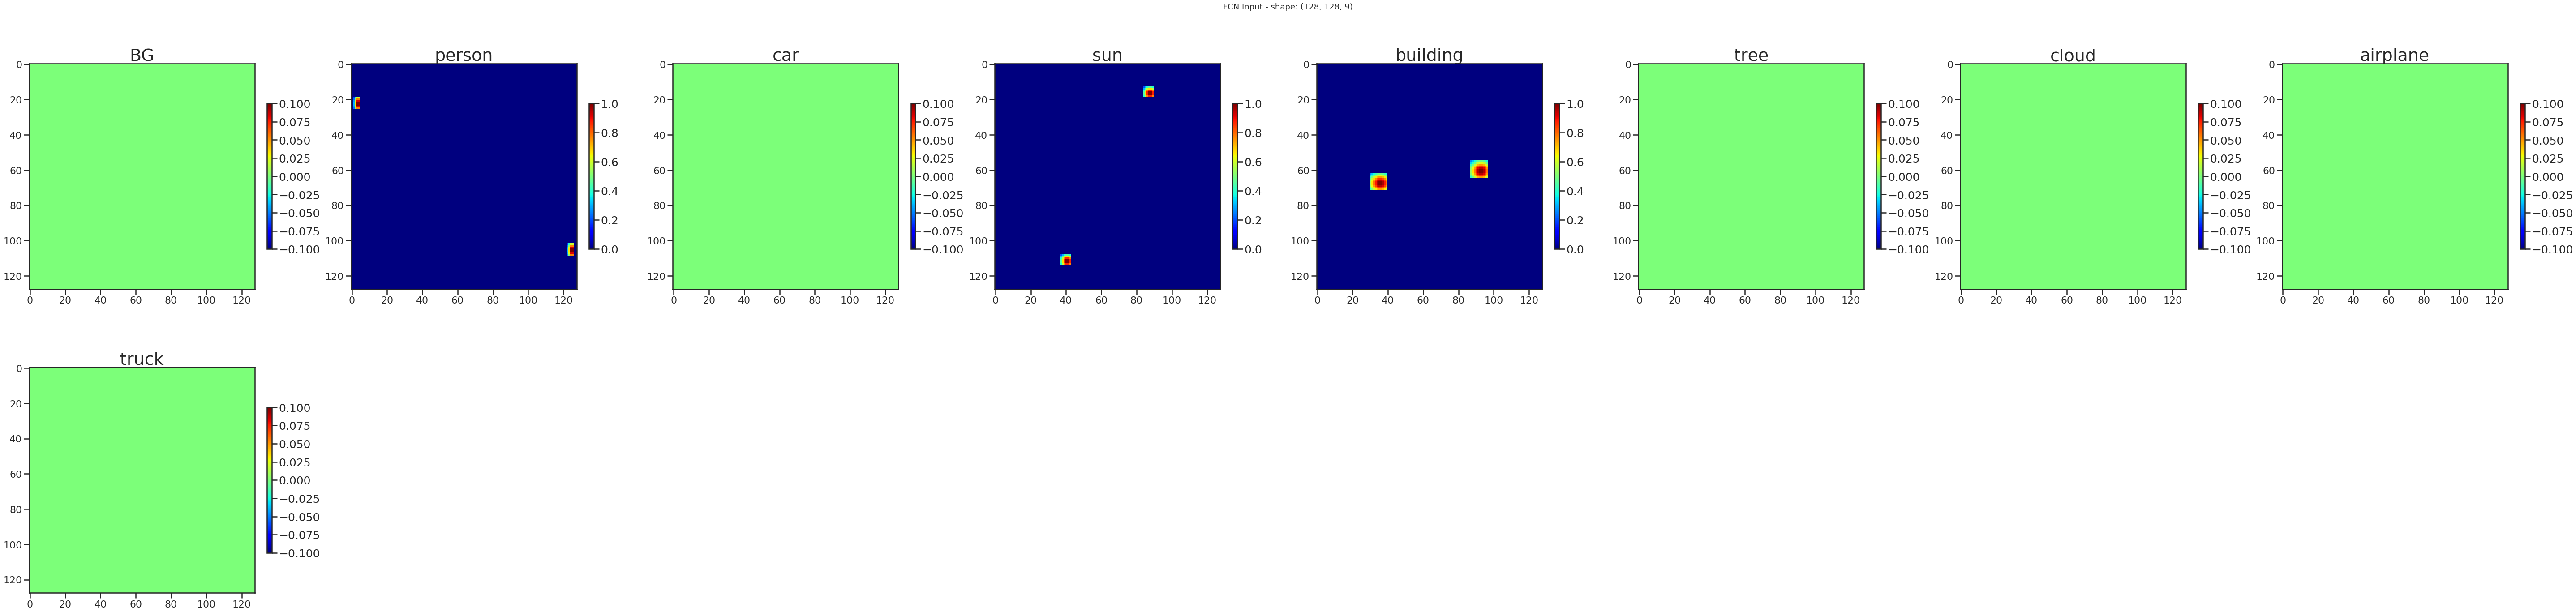

PR_SCORES from fcn/mrcnn_results:
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                              |   |                |        MRCNN score 0       |          MRCNN score 1             |           MRCNN score 2            |                         
          class               |TP/| mrcnn  normlzd |  gaussian   bbox   nrm.scr*|  ga.sum    mask     score   norm   |  ga.sum    mask     score   norm   |                         
    seq  id name              | FP| score   score  |    sum      area   gau.sum |  in mask   sum              score  |  in mask   sum              score  |  Y1  X1  Y2  X2   AREA  
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  0  64  3 sun                | 1 | 0.9479  1.0000 |   0.9866   225.0  

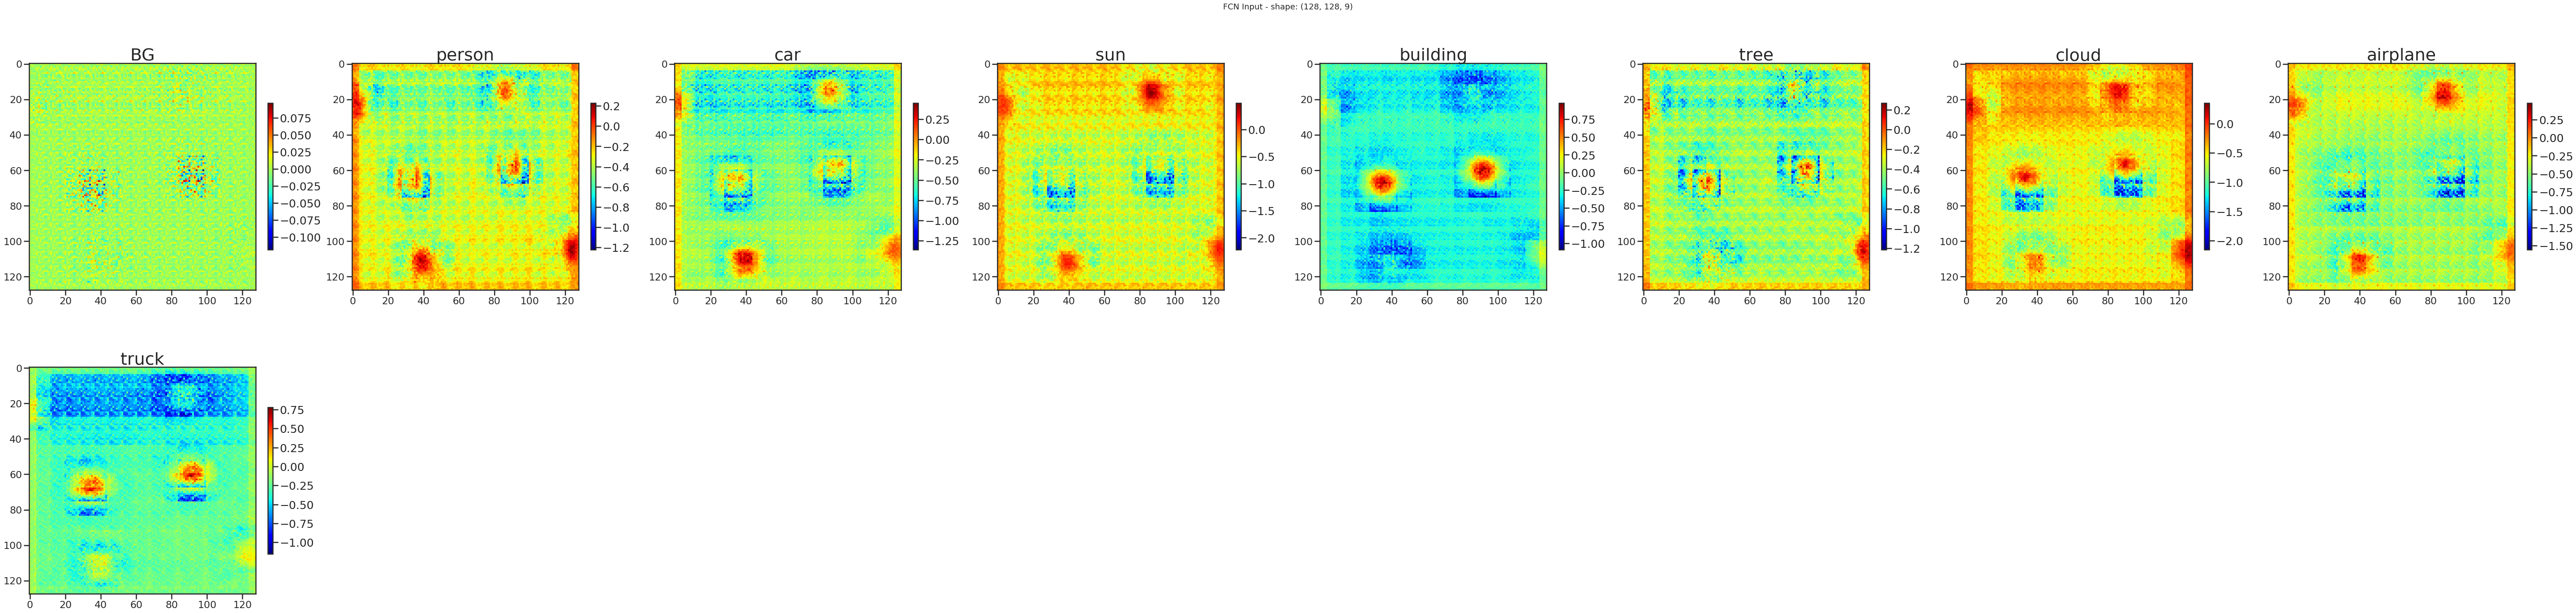


FCN_SCORES:
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                              |   |                |         FCN score 0        |            FCN score 1             |            FCN score 2             |                         
          class               |TP/| mrcnn  normlzd |  gaussian   bbox   nrm.scr*|  ga.sum    mask     score   norm   |  ga.sum    mask     score   norm   |                         
    seq  id name              | FP| score   score  |    sum      area   gau.sum |  in mask   sum              score  |  in mask   sum              score  |  Y1  X1  Y2  X2   AREA  
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  0  64  3 sun                | 1 | 0.9479  1.0000 |  -0.5098   225.0   -0.5098 |  11.9502  

In [23]:
f = fcn_results[0]
# print(f['detections'][:20])
# # print(f['gt_bboxes'][:20])
# print(f['gt_class_ids'])
print()
# print(f['pr_scores'])
# print(f['fcn_scores'])
print('min: {:9.4f}   mean:{:9.4f}   max: {:9.4f}   stddev:{:9.4f}   sum:{:9.4f} '.
      format(np.min(f['pr_hm'][:,:,3]), np.mean(f['pr_hm'][:,:,3]), np.max(f['pr_hm'][:,:,3]), np.std(f['pr_hm'][:,:,3]), np.sum(f['pr_hm'][:,:,3])))
print('min: {:9.4f}   mean:{:9.4f}   max: {:9.4f}   stddev:{:9.4f}   sum:{:9.4f} '.
      format(np.min(f['fcn_hm'][:,:,3]), np.mean(f['fcn_hm'][:,:,3]), np.max(f['fcn_hm'][:,:,3]), np.std(f['fcn_hm'][:,:,3]), np.sum(f['fcn_hm'][:,:,3])))

vis2.display_fcn_input(f['pr_hm'], class_names)

vis2.display_pr_scores(f['pr_scores'], class_names)
print('\n\n')
vis2.display_fcn_output(f['fcn_hm'], class_names)
vis2.display_fcn_scores(f['fcn_scores'], class_names)

#### Display FCN bbox score info - style 1

In [59]:
vis2.display_fcn_scores_box_info(f['fcn_scores'], f['fcn_hm'], class_names)

  FCN BBox Information - classes   --  :  [    1.0000     3.0000     4.0000]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                         |                                                 |    (COVAR)    |               CLIP REGION   
BOX     class                                            |                   Width   Height                |      SQRT     |      FROM/TO               FROM/TO 
seq  id     name              Y1/X1              Y2/X2   |    CX / CY         (W)  ~  (H)      AREA        |  W/2     H/2  |  X       Y        A |  X       Y       A
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 64   3 sun             (  9.00, 80.00)  ( 24.00, 95.00) |  87.50/ 16.50    15.00~  15.00 

#### Display FCN bbox score info - style 2

In [24]:
vis2.display_fcn_scores_box_info2(f['fcn_scores'], class_names, f['fcn_hm'])

  classes     :  [    1.0000     3.0000     4.0000]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                       |                                              |   (COVAR)     |    
BOX                                    |                   Width   Height             |     SQRT      |   FROM/TO  
seq       X1/Y1              X2/Y2     |    CX / CY         (W)  ~  (H)      AREA     |  W/2    H/2   |  X      Y 
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
 64   ( 80.00,  9.00)  ( 95.00, 24.00) |  87.50/ 16.50    15.00~  15.00   225.00 36.0 |   2.74    2.74| 85

#### Display MRCNN results - 1st style

In [29]:
vis2.display_pr_fcn_style1(fcn_results[0], class_names)


         bbox seq id : [        64         63         62         61         60         59]
  f[class_ids] class : [         3          3          4          4          1          1]
   f[pr_score] class : [         3          3          4          4          1          1]
  f[fcn_score] class : [         3          3          4          4          1          1]
                               sun        sun   building   building     person     person
           TP/FP Ind : [         1         -1         -1          1         -1          1]
      pr  orig score : [    0.9479     0.9470     0.9323     0.9317     0.9050     0.9046]
      fcn orig score : [    0.9479     0.9470     0.9323     0.9317     0.9050     0.9046]
      cls norm score : [    1.0000     0.9991     1.0000     0.9994     1.0000     0.9996]
           bbox area : [  225.0000   225.0000  2009.0000  2009.0000   115.0000   115.0000]
           clip area : [   36.0000    36.0000   100.0000   100.0000    28.0000    28.0000]


####  Display MRCNN scores - 2nd style

In [34]:
vis2.display_pr_fcn_style2(fcn_results[0], class_names)

0 [         9         80         24         95]  3  sun...............  0.9479 [    3.0000     0.9479     1.0000    64.0000     1.0000]  
                                                             mrcnn old style scores:   [    0.9866   225.0000     0.9866]
                                                               fcn old style scores:   [   -0.5098   225.0000    -0.5098]

                                                                  mrcnn alt scores1:   [   23.7169    36.0000     0.6588     1.0000     1.0000     1.0000]
                                                                    fcn alt scores1:   [   11.9502    36.0000     0.3320     1.0000     1.0000     1.0000]

                                                                      mrcnn_scores2:   [   23.7169    36.0000     0.6588     1.0000     1.0000     1.0000]
                                                                        fcn_scores2:   [   24.8258    36.0000     0.6896     1.0000     1.0000     1.00

####  Display MRCNN scores - 3rd style

In [38]:
vis2.display_pr_fcn_style3(fcn_results[0], class_names)

(64, 7)
  alt_score  0: (gauss. sum over large bbox / bbox area/ gauss_sum * normlzd_score))
  alt_scores 1: (gauss. sum over small mask / mask area/ gauss_sum / mask_area):  
4 [        11          1         34          6]
4 [   11.0000     1.0000    34.0000     6.0000     1.0000     0.9050    -1.0000    60.0000     1.0000] 1.0 person        --> ADDED FP 

4                                                              pr: alt_scores 0 [9,10,11]:   [    0.8734   115.0000     0.8734]
4                                                                  alt_scores 1 [12 - 17]:   [   17.7331    28.0000     0.6333     1.0000     1.0000     1.0000]
4                                                                  alt_scores 2 [18 - 23]:   [   17.7331    28.0000     0.6333     1.0000     1.0000     1.0000]
4
4                                                              fcn: alt_score 0 [9,10,11]:   [   -6.9184   115.0000    -6.9184]
4                                                           

### Display detections on Image

In [ ]:
f = fcn_results[0]
print(np.unique(f['gt_class_ids']))
print(np.unique(f['class_ids']))
print('Image Meta: ', f['image_meta'][:10])
visualize.display_instances(f['image'], f['rois'],  f['class_ids'], dataset_test.class_names, f['scores'],
#                            only_classes=[6],
                            title="MRCNN Predictions", score_range=(0.0, 1.7))
#  only_classes=[27],

In [ ]:
#### Display detections
## old_score   : 11
## alt_score_1 : 14
## alt_score_2 : 20
from mrcnn.utils import log # Display results
# ax = visualize.get_ax(rows =1, cols = 1, size= 20)
f = fcn_results[0]
clses = None
class_ids = np.unique(f['pr_scores'][:,4]).astype(int).tolist()
print('class ids: ', class_ids)
print('Image Meta: ', f['image_meta'][:10])
# visualize.display_instances_from_prscores(f['image'], f['pr_scores'], class_names, score_range=(-999, 9999), only_classes = [1])
# visualize.display_instances(f['image'], f['rois'],  f['class_ids'], class_names, f['scores'], title="Predictions", score_range=(0.7, 0.99), size = 24)
# visualize.display_instances(f['image'], f['rois'], f['class_ids'], class_names, f['scores'], title="Predictions - Orig Score", score_range=(0.0, 1.99), size = 24, only_classes=clses)
visualize.display_instances_two_scores(f['image'], f['rois'], f['class_ids'], class_names, f['pr_scores'][:,11], f['fcn_scores'][:,11],title="Predictions - Alt Score 0 ", only_classes=clses)
visualize.display_instances_two_scores(f['image'], f['rois'], f['class_ids'], class_names, f['pr_scores'][:,14], f['fcn_scores'][:,14],title="Predictions - Alt Score 1 ", only_classes=clses)
visualize.display_instances_two_scores(f['image'], f['rois'], f['class_ids'], class_names, f['pr_scores'][:,20], f['fcn_scores'][:,20],title="Predictions - Alt Score 2 ", only_classes=clses)
# visualize.display_instances_two_scores(f['image'], f['rois'], f['class_ids'], class_names, f['pr_scores'][:,17], f['fcn_scores'][:,17],title="Predictions - Alt Score 1 (Normalized by class)", only_classes=clses)
# visualize.display_instances_two_scores(f['image'], f['rois'], f['class_ids'], class_names, f['pr_scores'][:,23], f['fcn_scores'][:,23],title="Predictions - Alt Score 2 (Normalized by class)", only_classes=clses)


#### Display Img with GT bboxes

 Image_id    :  33  Reference:  [('cloud', (220.0, 220.0, 220.0), (18, 12, 27, 5)), ('cloud', (192.0, 192.0, 192.0), (86, 12, 16, 5)), ('cloud', (245.0, 245.0, 245.0), (103, 17, 29, 7)), ('airplane', (48.0, 188.0, 132.0), (69, 24, 16, 6)), ('airplane', (243.0, 228.0, 90.0), (20, 31, 18, 7)), ('truck', (240.0, 166.0, 22.0), (96, 76, 21, 7)), ('truck', (24.0, 201.0, 15.0), (91, 85, 25, 8)), ('person', (210.0, 105.0, 30.0), (42, 93, 1, 9)), ('person', (240.0, 230.0, 140.0), (66, 93, 1, 9)), ('tree', (0.0, 128.0, 0.0), (81, 84, 9, 20)), ('truck', (20.0, 153.0, 192.0), (65, 113, 51, 12))] Coco Id: 33
 Image meta  :  [ 33 128 128   3   0   0 128 128   1   1]
 Class ids   :  (11,)    [6 6 6 7 7 8 8 1 1 5 8]
 Class Names :  ['cloud', 'cloud', 'cloud', 'airplane', 'airplane', 'truck', 'truck', 'person', 'person', 'tree', 'truck']


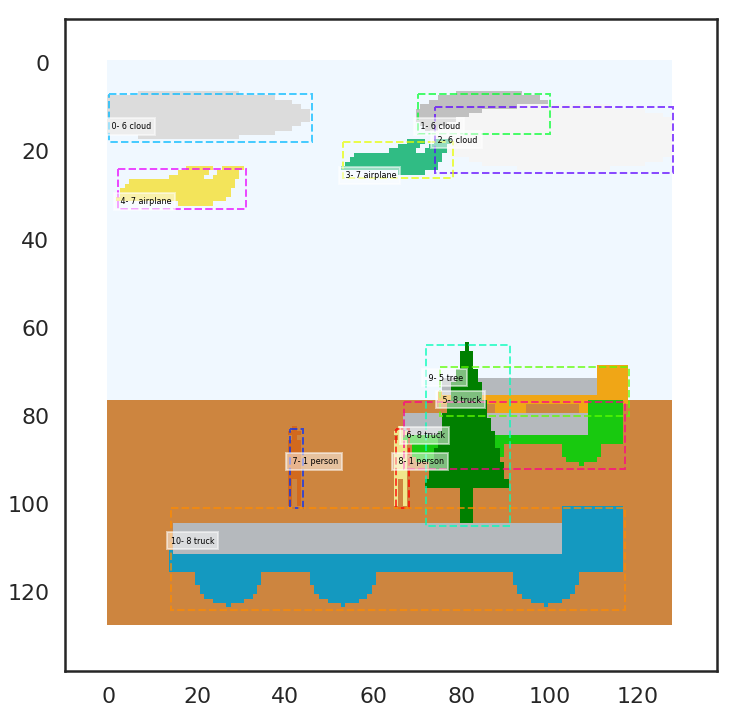

In [10]:
visualize.display_image_gt(dataset_test, mrcnn_model.config, [33] ,
#                            only_classes=[44,46] 
                          )

### Compute mAP and Display Precision/Recall Curve

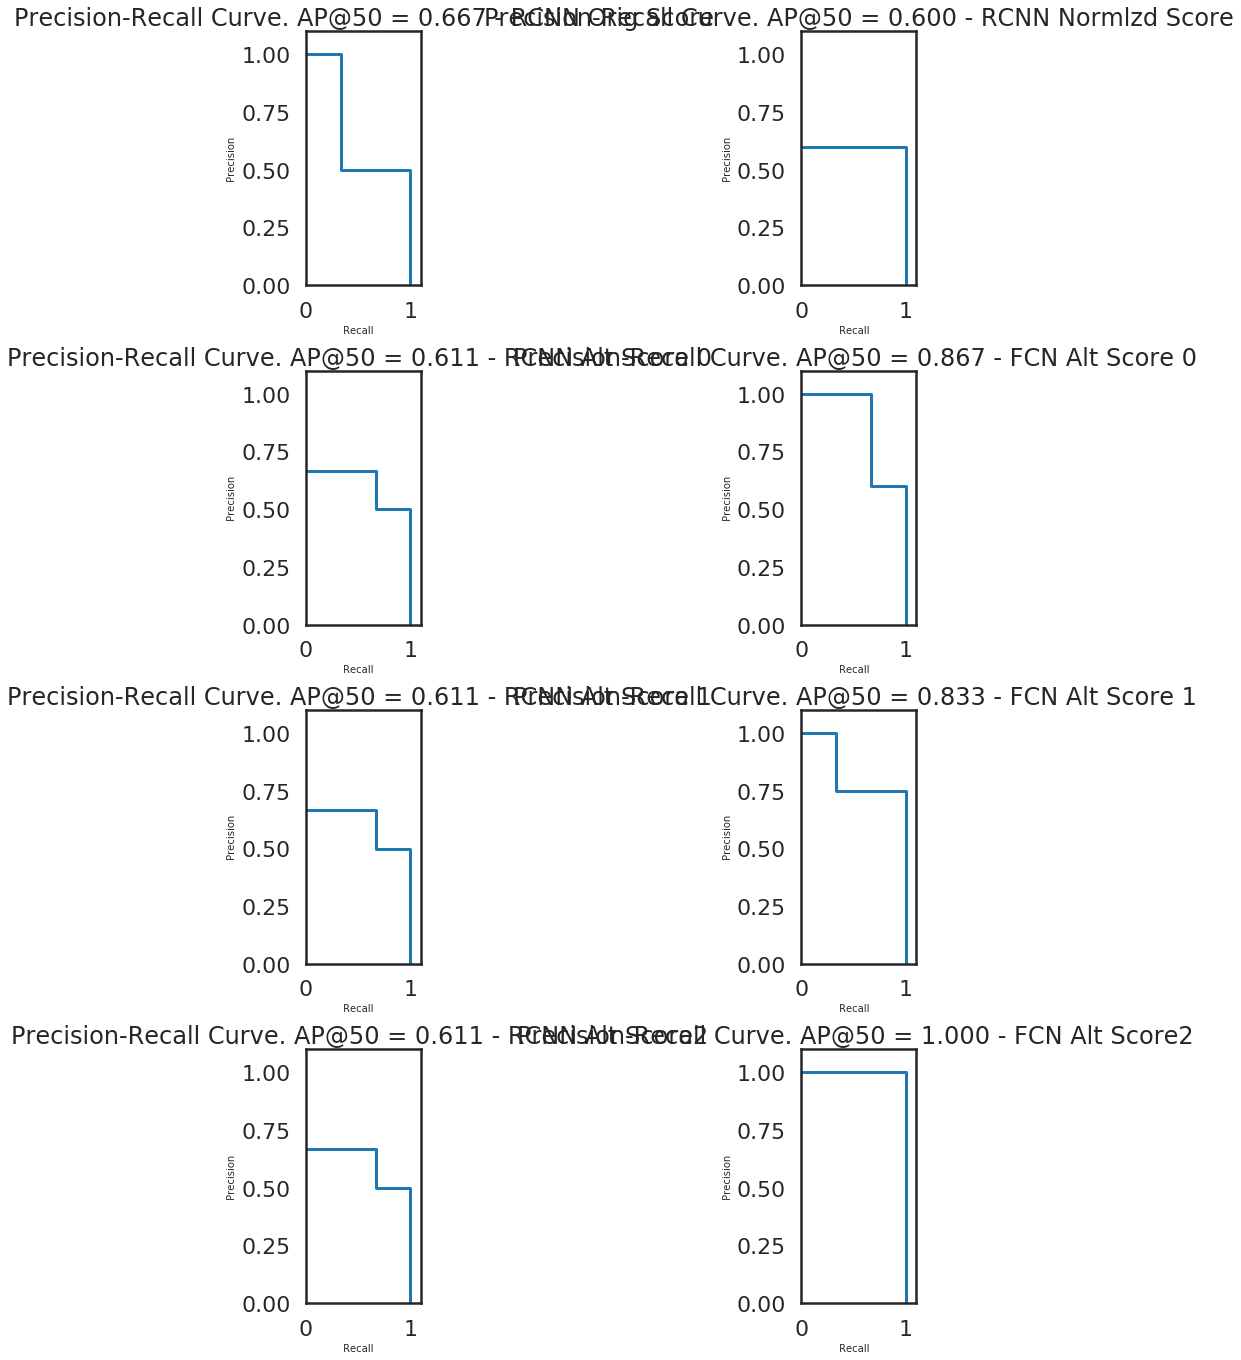

In [60]:
visualize.plot_precision_recall_compare(fcn_results)

In [ ]:
orig_score = 5
norm_score = 8
alt_scr_0  = 11
alt_scr_1  = 14   # in MRCNN alt_scr_1 ans alt_scr_2 are the same
alt_scr_2  = 20

# # Draw precision-recall curve
f = fcn_results[0]
AP, precisions, recalls, overlaps = utils.compute_ap(f['gt_bboxes'], f['gt_class_ids'], f['molded_rois'], f['class_ids'], f['scores'])
visualize.plot_precision_recall(AP, precisions, recalls,ttl = "- Orig Score")
# AP, precisions, recalls, overlaps = utils.compute_ap(f['gt_bboxes'], f['gt_class_ids'], f['molded_rois'], f['class_ids'], f['pr_scores'][:,norm_score])
# visualize.plot_precision_recall(AP, precisions, recalls, ttl = "- Normlzd Score")

# AP, precisions, recalls, overlaps = utils.compute_ap(f['gt_bboxes'], f['gt_class_ids'], f['molded_rois'], f['class_ids'], f['pr_scores'][:,alt_scr_0])
# visualize.plot_precision_recall(AP, precisions, recalls, ttl = "- RCNN Alt Score 0 ")
# AP, precisions, recalls, overlaps = utils.compute_ap(f['gt_bboxes'], f['gt_class_ids'], f['molded_rois'], f['class_ids'], f['fcn_scores'][:,alt_scr_0])
# visualize.plot_precision_recall(AP, precisions, recalls, ttl = "- FCN Alt Score 0 ")

# AP, precisions, recalls, overlaps = utils.compute_ap(f['gt_bboxes'], f['gt_class_ids'], f['molded_rois'], f['class_ids'], f['pr_scores'][:,alt_scr_1])
# visualize.plot_precision_recall(AP, precisions, recalls, ttl = "- RCNN Alt Score 1 ")
# AP, precisions, recalls, overlaps = utils.compute_ap(f['gt_bboxes'], f['gt_class_ids'], f['molded_rois'], f['class_ids'], f['fcn_scores'][:,alt_scr_1])
# visualize.plot_precision_recall(AP, precisions, recalls, ttl = "- FCN Alt Score 1 ")


# AP, precisions, recalls, overlaps = utils.compute_ap(f['gt_bboxes'], f['gt_class_ids'], f['molded_rois'], f['class_ids'], f['pr_scores'][:,alt_scr_2])
# visualize.plot_precision_recall(AP, precisions, recalls, ttl = "- RCNN Alt Score 1 ")
# AP, precisions, recalls, overlaps = utils.compute_ap(f['gt_bboxes'], f['gt_class_ids'], f['molded_rois'], f['class_ids'], f['fcn_scores'][:,alt_scr_2])
# visualize.plot_precision_recall(AP, precisions, recalls, ttl = "- FCN Alt Score 1 ")

##  Run MRCNN detection pipeline on second image

In [ ]:
from mrcnn.prep_notebook import get_evaluate_batch
# from mrcnn.prep_notebook import get_training_batch, get_inference_batch, get_evaluate_batch
IMAGE_LIST = [4745]
# eval_batch = get_evaluate_batch(dataset_test, mrcnn_model.config, generator = test_generator, display = True)
eval_batch = get_evaluate_batch(dataset_test, mrcnn_model.config, IMAGE_LIST, display = True)

In [ ]:
fcn_results = fcn_model.evaluate(mrcnn_model, eval_batch, verbose =0)

### Display detections on Image

In [ ]:
f = fcn_results[0]
print('Image Meta: ', f['image_meta'][:10])
visualize.display_instances(f['image'], f['rois'],  f['class_ids'], dataset_test.class_names, f['scores'], title="MRCNN Predictions", score_range=(0.0, 0.7))
#  only_classes=[27],

In [ ]:
#### Display detections
## old_score   : 11
## alt_score_1 : 14
## alt_score_2 : 20
from mrcnn.utils import log # Display results
# ax = visualize.get_ax(rows =1, cols = 1, size= 20)
r = fcn_results[0]
clses = [42]
class_ids = np.unique(r['pr_scores'][:,4]).astype(int).tolist()
print('class ids: ', class_ids)
print('Image Meta: ', r['image_meta'][:10])

# visualize.display_instances(r['image'], r['rois'],  r['class_ids'], class_names, r['scores'], title="Predictions", score_range=(0.7, 0.99), size = 24)
visualize.display_instances(r['image'], r['rois'],  r['class_ids'], class_names, r['scores'], title="Predictions", score_range=(0.0, 0.99), only_classes= [42], size = 24)
# visualize.display_instances_two_scores(r['image'], r['rois'], r['class_ids'], class_names, r['pr_scores'][:,11], r['fcn_scores'][:,11],title="Predictions", only_classes=clses,size = 24)
visualize.display_instances_two_scores(r['image'], r['rois'], r['class_ids'], class_names, r['pr_scores'][:,14], r['fcn_scores'][:,14],title="Predictions", only_classes=clses,size = 24)
visualize.display_instances_two_scores(r['image'], r['rois'], r['class_ids'], class_names, r['pr_scores'][:,20], r['fcn_scores'][:,20],title="Predictions", only_classes=clses,size = 24)

### Compute mAP and Display Precision/Recall Curve

In [ ]:
old_score   = 11
alt_score_1 = 14
alt_score_2 = 20
# Draw precision-recall curve
f = fcn_results[0]
AP, precisions, recalls, overlaps = utils.compute_ap(f['gt_bboxes'], f['gt_class_ids'], f['molded_rois'], f['class_ids'], f['scores'])
visualize.plot_precision_recall(AP, precisions, recalls)
AP, precisions, recalls, overlaps = utils.compute_ap(f['gt_bboxes'], f['gt_class_ids'], f['molded_rois'], f['class_ids'], f['pr_scores'][:,alt_score_1])
visualize.plot_precision_recall(AP, precisions, recalls)
AP, precisions, recalls, overlaps = utils.compute_ap(f['gt_bboxes'], f['gt_class_ids'], f['molded_rois'], f['class_ids'], f['fcn_scores'][:,alt_score_1])
visualize.plot_precision_recall(AP, precisions, recalls)

##  Run MRCNN detection pipeline on third image

### Load image using `get_evaluate_batch()`

In [ ]:
# 13378, 33816
image, _ = get_inference_batch(dataset_test, mrcnn_model, 13378, display=True)    

In [ ]:
results= run_mrcnn_detection(mrcnn_model,dataset_test, image_id=13378, verbose = 0)
r = results[0]

In [ ]:
print('Image Meta: ', r['orig_image_meta'][:10])
visualize.display_instances(r['image'], r['rois'],  r['class_ids'], dataset_test.class_names, r['scores'], 
                             title="Predictions", score_range=(0.0, 0.7))


#  Compute AP routine

In [ ]:
from mrcnn.utils import trim_zeros, compute_overlaps
np_format = {}
float_formatter = lambda x: "%10.4f" % x
int_formatter   = lambda x: "%10d" % x
np_format['float'] = float_formatter
np_format['int']   = int_formatter
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)
def compute_ap(gt_boxes, gt_class_ids,
               pred_boxes, pred_class_ids, pred_scores,
               iou_threshold=0.5):
    '''
    Compute Average Precision at a set IoU threshold (default 0.5).

    Returns:
    mAP:            Mean Average Precision
    precisions:     List of precisions at different class score thresholds.
    recalls:        List of recall values at different class score thresholds.
    overlaps:       [pred_boxes, gt_boxes] IoU overlaps.
    '''
    # Trim zero padding and sort predictions by score from high to low
    # TODO: cleaner to do zero unpadding upstream
    gt_boxes   = trim_zeros(gt_boxes)
    gt_class_ids = trim_zeros(np.expand_dims(gt_class_ids, axis = -1))
    pred_boxes = trim_zeros(pred_boxes)
    pred_scores= pred_scores[:pred_boxes.shape[0]]
    indices    = np.argsort(pred_scores)[::-1]   ## sort indices from largest to smallest
#     print('arg_sort indicies:', indices)
    pred_boxes     = pred_boxes[indices]
    pred_class_ids = pred_class_ids[indices]
    pred_scores    = pred_scores[indices]
    print(gt_boxes.shape, gt_class_ids.shape)
    print(pred_boxes.shape, pred_class_ids.shape, pred_scores.shape)
    print('ground truth:')
    print(np.concatenate([gt_boxes,gt_class_ids], axis = -1))    
    print('predcitions:')
    print(np.concatenate([pred_boxes,np.expand_dims(pred_class_ids, axis = -1), np.expand_dims(pred_scores, axis = -1)], axis = -1))
    print(' Total predicitons: ' , len(pred_scores))
    
    # Compute IoU overlaps [pred_boxes, gt_boxes]
    overlaps = compute_overlaps(pred_boxes, gt_boxes)
    print('overlaps: ',overlaps.shape)
    print(overlaps)
    
    # Loop through ground truth boxes and find matching predictions
    match_count = 0
    pred_match = np.zeros([pred_boxes.shape[0]])
    gt_match   = np.zeros([gt_boxes.shape[0]])
    
    for i in range(len(pred_boxes)):
        # Find best matching ground truth box
        sorted_ixs = np.argsort(overlaps[i])[::-1]
        for j in sorted_ixs:
            # If ground truth box is already matched, go to next one
            if gt_match[j] == 1:
                continue
            # If we reach IoU smaller than the threshold, end the loop
            iou = overlaps[i, j]
            if iou < iou_threshold:
                break
            # Do we have a match?
            if pred_class_ids[i] == gt_class_ids[j]:
                match_count  += 1
                gt_match[j]   = 1
                pred_match[i] = 1
                break
    print(' after overlap computation')
    print('match count:', match_count)
    print('pred_match :', pred_match)
    print('  gt_match :', gt_match)
    
    # Compute precision and recall at each prediction box step
    # Precision = TP / (TP+FP)      Recall = TP / (TP + FN)
    precisions = np.cumsum(pred_match) / (np.arange(len(pred_match)) + 1)
    recalls    = np.cumsum(pred_match).astype(np.float32) / len(gt_match)
    
    print(' precisions')
    print(np.cumsum(pred_match), '/', (np.arange(len(pred_match)) + 1))
    print(precisions)
    print()
    print(' recalls ')
    print(np.cumsum(pred_match), '/', len(gt_match))
    print(recalls)
    print()
    
    # Pad with start and end values to simplify the math
    precisions = np.concatenate([[0], precisions, [0]])
    recalls    = np.concatenate([[0], recalls, [1]])
    print('appended [0/0], [0/1] to front/end of precisions/recalls')
    print(' Pr: ', precisions)
    print(' Rc: ', recalls)
    print()
    
    
    # Ensure precision values decrease but don't increase. This way, the
    # precision value at each recall threshold is the maximum it can be
    # for all following recall thresholds, as specified by the VOC paper.
    for i in range(len(precisions) - 2, -1, -1):
        precisions[i] = np.maximum(precisions[i], precisions[i + 1])
    print('backtracking precsiosn values:', list(range(len(precisions) - 2, -1, -1)))
    print(' Pr: ', precisions)
    print(' Rc: ', recalls)
    print()
    
    # Compute mean AP over recall range
    print(' Rc[:-1] : ', recalls[:-1])
    print(' Rc[1:]  : ', recalls[1:])
    print(' Pr[1:]  : ', precisions[1:])
    print()

    ## find points where recall values changes 
    indices = np.where(recalls[:-1] != recalls[1:])[0] + 1
    mAP     = np.sum((recalls[indices] - recalls[indices - 1]) * precisions[indices])
    
    print('where recalls[:-1] != recalls[1:]:', np.where(recalls[:-1] != recalls[1:]))
    print('indices at recall changes : ', indices)
    print(' A1: recall[indices]  : ', recalls[indices])
    print(' A2: recall[indices-1]: ', recalls[indices-1])
    print(' A1 - A2              : ', (recalls[indices] - recalls[indices - 1]))
    print(' P1:precision[indices]: ', precisions[indices])
    print(' (A1-A2)*P1           : ', (recalls[indices] - recalls[indices - 1]) * precisions[indices])
    print(' Sum = mAP            : ', mAP)
    print(' Pr        : ', precisions)
    print(' Rc        : ', recalls)
    print(' Pr*Rc     : ', precisions*recalls)
    print(' Sum(Pr*Rc): ', np.sum(precisions*recalls))
    print(' Sum(Pr*Rc)/m: ', np.sum(precisions*recalls)/len(precisions))
    return mAP, precisions, recalls, overlaps

In [ ]:
orig_score = 5
norm_score = 8
alt_scr_0  = 11
alt_scr_1  = 14   # in MRCNN alt_scr_1 ans alt_scr_2 are the same
alt_scr_2  = 20

# AP, precisions, recalls, overlaps = compute_ap(gt_data[0]['gt_bbox'], gt_data[0]['gt_class_id'], r['molded_rois'], r['class_ids'], r['scores'])
f = fcn_results[0]
print(f['gt_bboxes'].shape, f['gt_class_ids'].shape)
AP, precisions, recalls, overlaps = compute_ap(f['gt_bboxes'], f['gt_class_ids'], f['molded_rois'], f['class_ids'], f['pr_scores'][:,orig_score])
visualize.plot_precision_recall(AP, precisions, recalls,ttl = "- Orig Score")

In [ ]:
len(precisions)
precisions


In [ ]:
f = fcn_results[0]
f.keys()

# Display Heatmaps

In [11]:
# from mrcnn.visualize import (plot_one_bbox_heatmap, 
#                              plot_3d_heatmap, plot_2d_heatmap, 
#                               plot_2d_heatmap_compare, plot_3d_heatmap_compare)
# import matplotlib as plt
img_id = 0
f= fcn_results[img_id]
image_id=f['image_meta'][0]
print('Image id: ',image_id, ' Coco ID: ', dataset_test.image_info[image_id]['id'])
print(f['pr_scores'][:,4])

coco_class_names = dataset_test.class_names
gt_class_ids = np.unique(f['gt_class_ids']).astype(int).tolist()
pr_class_ids = np.unique(f['pr_scores'][:,4]).astype(int).tolist()
fcn_class_ids = np.unique(f['fcn_scores'][:,4]).astype(int).tolist()
print('  GT class ids: ', gt_class_ids)
print('Pred class ids: ', pr_class_ids)
print('FCN  class ids: ', fcn_class_ids)

NameError: name 'fcn_results' is not defined

## Overlay images with heatmaps

### Overlay image with pred_heatmaps

In [ ]:
from mrcnn.visualize import display_heatmaps, display_heatmaps_fcn, display_heatmaps_mrcnn, inference_heatmaps_display
# visualize.display_image_bw(image)
# print(model_gt_heatmap_scores.shape)
class_ids = np.unique(f['pr_scores'][:,4]).astype(int).tolist()
print('class ids: ', class_ids)
inference_heatmaps_display(fcn_results, 0, class_ids = class_ids, class_names = coco_class_names, hm = 'pr_hm' ,config = mrcnn_model.config, scaling = 'class', columns = 4) 
# , display_heatmaps_mrcnn(train_batch_x, model_output, 0, hm = 'pr',  
#                      config = mrcnn_config, class_ids = class_ids)

### Overlay image with fcn_heatmaps

In [ ]:
from mrcnn.visualize import display_heatmaps, display_heatmaps_fcn, display_heatmaps_mrcnn, inference_heatmaps_display
# visualize.display_image_bw(image)
# print(model_gt_heatmap_scores.shape)
class_ids = np.unique(f['pr_scores'][:,4]).astype(int).tolist()
print('class ids: ', class_ids)
inference_heatmaps_display(fcn_results, 0, 
#                            class_ids = class_ids, 
                           class_names = coco_class_names, hm = 'fcn_hm' ,config = mrcnn_model.config, scaling = 'all', columns = 4) 
# , display_heatmaps_mrcnn(train_batch_x, model_output, 0, hm = 'pr',  

### Overlay image with pr_heatmaps and fcn_heatmaps

In [ ]:
visualize.inference_heatmaps_compare(fcn_results, image_id = 0 , hm = 'fcn_hm', 
                     config = mrcnn_model.config, 
#                      class_ids = pr_class_ids, 
                     class_names = coco_class_names, scaling = 'clip')

## 2D Plots

###  2D plot of `model_gt_heatmap`  

In [ ]:
print('Image : {}  ClassIds: {}'.format(img_id, gt_class_ids))
visualize.plot_2d_heatmap(model_gt_heatmap, model_gt_heatmap_scores, img_id, gt_class_ids, 
                 class_names = coco_class_names, columns = 3, scale = 4, scaling = 'all')

###  2D plot of `pr_heatmap` (w/ Ground Truth Bounding Boxes)

In [ ]:
print('Image : {}  ClassIds: {}'.format(img_id, pr_class_ids))
_ = visualize.plot_2d_heatmap(f['pr_hm'], f['pr_hm_scores'],0, gt_class_ids, columns = 2,
                             class_names = coco_class_names, scale = 1, scaling = 'none')

###  2D plot of `fcn_heatmap` (w/ GT Bounding Boxes)

In [ ]:
print('Image : {}  ClassIds: {}'.format(img_id, gt_class_ids))
disp_classes = None 

_ = visualize.plot_2d_heatmap(f['fcn_hm'], f['fcn_hm_scores'],img_id, disp_classes, columns = 2, size=(9,9),
                             class_names = coco_class_names, scale = 1, scaling = 'none')

###  2D plot of `model_fcn_heatmap` (w/ MRCNN PREDICTED Bounding Boxes)

In [ ]:
print(f['fcn_hm'].shape)
print('Image : {}  ClassIds: {}'.format(img_id, pr_class_ids))
fig  = visualize.plot_2d_heatmap(f['fcn_hm'], f['fcn_hm_scores'],img_id, pr_class_ids, columns = 2,
                             class_names = coco_class_names, scale = 1, scaling = 'class')

####  2D plot of `model_fcn_heatmap` returned from model - ALL CLASSES

In [ ]:
# class_ids = np.unique(model_pred_heatmap_scores[img_id,:,:,4]).astype(int).tolist()
# print('Image : {}  Pred ClassIds: {}'.format(img_id, class_ids))
# fig  = visualize.plot_2d_heatmap(model_fcn_heatmap, model_fcn_scores, img_id, 
#                                  columns = 5, class_names = coco_class_names, scale = 4, scaling = 'class')    
#     fig.savefig('fcn_heatmaps_2d.png')

####  2D comparative display `pred_heatmap` / `fcn_heatmap`  

In [ ]:
print(f['pr_hm_scores'].shape)
for img_id in [0]: ##range(mrcnn_config.BATCH_SIZE):
    class_ids = np.unique(f['pr_hm_scores'][:,:,4]).astype(int).tolist()
    print('Image : {}  ClassIds: {}'.format(img_id, class_ids))
#     class_ids = list(range(30))
    _ = visualize.plot_2d_heatmap_compare(f['pr_hm'], f['fcn_hm'], f['pr_hm_scores'],  
                            img_id, class_ids = class_ids, class_names = class_names, scale = 1, scaling = 'none' )    

##  3D Plots

###  3D plot of `fcn_heatmap` returned form model - classes predicted by MRCNN only 

In [ ]:
# import matplotlib.pyplot as plt
# from   mpl_toolkits.mplot3d import Axes3D

# from importlib import reload
# reload(plt)
# %matplotlib notebook
print(np.max(f['fcn_hm']), np.min(f['fcn_hm']))
print(f['fcn_hm'].shape)
class_ids = pr_class_ids
class_ids = None 
# class_ids = np.arange(10)
print('Image : {}  ClassIds: {}'.format(img_id, class_ids))
# visualize.plot_3d_heatmap(f['fcn_hm'], 0, class_ids,class_names = class_names, scaling = 'none', size = (24,24), columns = 1)
visualize.plot_3d_gaussian(f['fcn_hm'][:,:,6])

###  3D plot of `fcn_softmax` returned form model - only classes in pred_scores

In [ ]:
for img_id in [0]: ##range(mrcnn_config.BATCH_SIZE):
    print(f['fcn_hm'].shape)
    class_ids = np.unique(f['pr_scores'][:,4]).astype(int).tolist()
    print('Image : {}  ClassIds: {}'.format(img_id, class_ids))
    visualize.plot_3d_heatmap(f['fcn_sm'], 0,class_names = coco_class_names, scaling = 'none')

# Run Object Detection on sample images

### Test on a random image from images folder

In [ ]:
# Load a random image from the images folder
# import mrcnn.visualize as visualize
import random
import skimage.io
import matplotlib.pyplot as plt
IMAGE_DIR = 'E:/git_projs/mrcnn3/images'
# IMAGE_DIR = '/esat/tiger/joramas/mscStudentsData/kbardool/projs/mrcnn3/images'
file_names = next(os.walk(IMAGE_DIR))[2]
# print(file_names)
random_filename = random.choice(file_names)
print(random_filename)
image = skimage.io.imread(os.path.join(IMAGE_DIR, random_filename))
plt.figure(figsize=(11,11))
plt.imshow(image)

In [ ]:
# Run detection
# results = mrcnn_model.detect([image], verbose=1)
results = fcn_model.detect_from_images(mrcnn_model, [image], verbose=1)

###  Test on loaded image

In [ ]:
# Visualize results
r = results[0]
for bbox, cls, scr in zip(r['rois'], r['class_ids'],  r['scores']):
    print('{}    {:2d}    {:.<20s}  {:5.4f} '.format(bbox, cls, dataset_test.class_names[cls], scr))
visualize.display_instances(image, r['rois'], r['class_ids'], dataset_test.class_names, r['scores']) #, score_range=(0.21, 0.22))

In [ ]:
r = results[0]
for bbox, cls, scr in zip(r['rois'], r['class_ids'],  r['scores']):
    print('{}    {:2d}    {:.<20s}  {:5.4f} '.format(bbox,cls,dataset_test.class_names[cls], scr))
visualize.display_instances(image, r['rois'], r['class_ids'], dataset_test.class_names, r['scores'], ax=visualize.get_ax(size=16))

###  Display random image from test dataset

In [ ]:
# Load random image and mask. ### 27711 persons and boats
image_id = np.random.choice(dataset_test.image_ids)
image    = dataset_test.load_image(image_id)
mask, class_ids = dataset_test.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset_test.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
print(class_ids.shape[0], bbox.shape[0])
# Display image and instances
# visualize.display_instances_with_mask(image, bbox, mask, class_ids, dataset_train.class_names)
visualize.display_instances(image, bbox, class_ids, dataset_test.class_names)

In [ ]:
results = mrcnn_model.detect([image], verbose=1)

In [ ]:
print('resutls :', results)
# Visualize results
r = results[0]
for bbox, cls, scr in zip(r['rois'], r['class_ids'],  r['scores']):
    print('{}    {:2d}    {:.<20s}  {:5.4f} '.format(bbox,cls,dataset_test.class_names[cls], scr))
visualize.display_instances(image, r['rois'], r['class_ids'], dataset_test.class_names, r['scores'])

### Test on a random image from test dataset

In [ ]:
# Test on a random image
# Validation dataset
# dataset_val = shapes.ShapesDataset()
# dataset_val.load_shapes(50, config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1])
# dataset_val.prepare()

image_id = random.choice(dataset_test.image_ids)
original_image, image_meta, gt_class_id, gt_bbox =\
    load_image_gt(dataset_test, mrcnn_config, image_id, use_mini_mask=False)
    

print('Image Id :', image_id)    
shape_list = dataset_test.image_info[image_id] 
pp.pprint(shape_list)
log("original_image", original_image)
log("image_meta", image_meta)
print(image_meta)
log("gt_class_id", gt_bbox)
log("gt_bbox", gt_bbox)
# log("gt_mask", gt_mask)

print(" 1: person   2: car  3: sun  4: building  5: tree  6: cloud ")
visualize.display_instances(original_image, gt_bbox, gt_class_id, 
                            dataset_test.class_names, figsize=(8, 8))

In [ ]:
results = model.detect([original_image], verbose=1)

In [ ]:
r = results[0]
print('  rois       : ', r['rois'])
print('  masks      : ', r['masks'].shape)
print('  class ids  : ', r['class_ids'])
print('  class names: ', dataset_test.class_names)
print('  scores     : ', r['scores'])
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_test.class_names, r['scores'], ax=get_ax())

# Evaluation of mAP  over a number of images

### Setup weight files

In [27]:
np_format = {}
np_format['float'] = lambda x: "%10.4f" % x
np_format['int']   = lambda x: "%10d" % x
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

All_APResults = {}

####eval_method = '1'
# save_path = "E:\\git_projs\\MRCNN3\\train_newshapes\\eval_method"+eval_method+"_results"
save_path = "/home/kbardool/git_projs/mrcnn3/train_newshapes_2/BCE_test_results_jupyter"
file_prefix = 'eval'+eval_method
old_AP_results_file = file_prefix+'_AP_results_2019_03_31'
new_AP_results_file = file_prefix+'_AP_results_2019_04_01'
print('Path:' ,save_path, '     Old Filename: ', old_AP_results_file,  'New Filename:', new_AP_results_file)

Path: /home/kbardool/git_projs/mrcnn3/train_newshapes_2/BCE_test_results_jupyter      Old Filename:  eval1_AP_results_2019_03_31 New Filename: eval1_AP_results_2019_04_01


In [29]:
# DIR_WEIGHTS =  'F:/models_newshapes/train_fcn8_l2_newshapes/fcn20181224T0000' ### Training with LR=0.00001, MSE Loss NO L2 Regularization
# files   = ['fcn_0001.h5', 'fcn_0150.h5', 'fcn_0346.h5', 'fcn_0421.h5',
#            'fcn_0450.h5', 'fcn_0482.h5', 'fcn_0521.h5', 'fcn_0610.h5',
#            'fcn_0687.h5', 'fcn_0793.h5', 'fcn_0821.h5', 'fcn_0940.h5',
#            'fcn_1012.h5', 'fcn_1127.h5', 'fcn_1644.h5', 'fcn_1776.h5',
#            'fcn_1848.h5', 'fcn_2017.h5', 'fcn_2084.h5', 'fcn_x0434.h5', 'fcn_x0419.h5']


DIR_WEIGHTS =  '/home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000' ### Training with LR=0.00001, MSE Loss NO L2 Regularization

fcn_files  = ['fcn_0001.h5', 'fcn_0002.h5', 'fcn_0003.h5', 'fcn_0004.h5', 
              'fcn_0005.h5', 'fcn_0006.h5', 'fcn_0008.h5', 'fcn_0009.h5', 
              'fcn_0012.h5', 'fcn_0016.h5', 'fcn_0018.h5', 'fcn_0019.h5', 
              'fcn_0021.h5', 'fcn_0022.h5', 'fcn_0023.h5', 'fcn_0024.h5', 
              'fcn_0033.h5', 'fcn_0039.h5', 'fcn_0042.h5', 'fcn_0044.h5', 
              'fcn_0077.h5', 'fcn_0089.h5']


print(fcn_files[0])

fcn_0001.h5


### Load previously saved AP Results from file

In [4]:
with open(os.path.join(save_path, old_AP_results_file+'.pkl'), 'rb') as outfile:
    APRes = pickle.load(outfile)
All_APResults = APRes

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\git_projs\\MRCNN3\\train_newshapes\\eval_method1_results\\eval1_AP_results_2019_01_17.pkl'

### Display All_AP_Results contents

In [28]:
# print('/'.join(weights_file.split('/')[-3:]))
print(len(All_APResults.keys()))
for i in sorted(All_APResults):
    print(i, All_APResults[i]['Epochs'])

0


### Run `compute_ap` over images

In [30]:
for FILE_IDX in [0,1,2,3,4]:
    weights_file = os.path.join(DIR_WEIGHTS  , fcn_files[FILE_IDX])
    print("Loading weights ", weights_file)
    fcn_model.load_model_weights(weights_file)

    ###  Initialize data structures 
    orig_score = 5
    norm_score = 8
    alt_scr_0  = 11
    alt_scr_1  = 14   # in MRCNN alt_scr_1 ans alt_scr_2 are the same
    alt_scr_2  = 20
    IMGS       = 500
    
    # shuffled_image_ids = np.copy(dataset_test.image_ids)
    # np.random.shuffle(shuffled_image_ids)
    # image_ids = np.random.choice(dataset_test.image_ids, 300)
    
    image_ids = dataset_test.image_ids[:IMGS]
    print(len(image_ids))

    class_dict = []
    gt_dict = {}
    pr_dict = {}

    for a,b in zip(dataset_test.class_ids, dataset_test.class_names):
        class_dict.append({'id'   : int(a),
                            'name' : b,
                            'scores': [],
                            'bboxes': [],
                            'mrcnn_score_orig' : [],
                            'mrcnn_score_norm' : [], 
                            'mrcnn_score_0' : [],
                            'mrcnn_score_1' : [],
                            'mrcnn_score_2' : [],
                            'fcn_score_0' : [],
                            'fcn_score_1' : [],
                            'fcn_score_2' : [],      
                            'mrcnn_score_1_norm': [],
                            'mrcnn_score_2_norm': [],                           
                            'fcn_score_1_norm'  : [],
                            'fcn_score_2_norm'  : []                           
                          })
    # Compute VOC-Style mAP @ IoU=0.5
    # Running on 10 images. Increase for better accuracy.


    MRCNN_AP_Orig = []
    MRCNN_AP_0 = [] 
    MRCNN_AP_1 = [] 
    MRCNN_AP_2 = []
    FCN_AP_0   = []
    FCN_AP_1   = []
    FCN_AP_2   = []

    for image_id in image_ids:
        # Load image and ground truth data
        print('==> Calculate AP for image_id : ', image_id)
        # Run object detection
        eval_batch = get_evaluate_batch(dataset_test, mrcnn_model.config, image_id, display = False)    
        fcn_results = fcn_model.evaluate(mrcnn_model, eval_batch, verbose =0)    

        gt_dict, pr_dict, class_dict = cmap.update_map_dictionaries(fcn_results, gt_dict,pr_dict, class_dict)

        r = fcn_results[0] 

        #   Compute  AP, precisions, recalls, overlaps
        AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r["molded_rois"], r["class_ids"], r["pr_scores"][:,orig_score])
        MRCNN_AP_Orig.append(AP)

        AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r["molded_rois"], r["class_ids"], r["pr_scores"][:,alt_scr_0])
        MRCNN_AP_0.append(AP)

        AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r["molded_rois"], r["class_ids"], r["fcn_scores"][:,alt_scr_0])
        FCN_AP_0.append(AP)

        AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r["molded_rois"], r["class_ids"], r["pr_scores"][:,alt_scr_1])
        MRCNN_AP_1.append(AP)

        AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r["molded_rois"], r["class_ids"], r["fcn_scores"][:,alt_scr_1])
        FCN_AP_1.append(AP)

        AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r["molded_rois"], r["class_ids"], r["pr_scores"][:,alt_scr_2])
        MRCNN_AP_2.append(AP)

        AP, _, _, _= utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r["molded_rois"], r["class_ids"], r["fcn_scores"][:,alt_scr_2])
        FCN_AP_2.append(AP)

    print('complete')

    ### Append data to All_APResults
    ###--------------------------------------------------------------------------
    epochs = fcn_files[FILE_IDX].split('_')[1].replace('.h5','')
    print('AP Calcs complete for epoch:', epochs , ' Weight file:', weights_file)

    APResult = {}
    APResult['Filename']      =  weights_file  
    APResult['Epochs']        =  epochs
    APResult['MRCNN_AP_Orig'] =  MRCNN_AP_Orig
    APResult['MRCNN_AP_0'   ] =  MRCNN_AP_0   
    APResult['MRCNN_AP_1'   ] =  MRCNN_AP_1   
    APResult['MRCNN_AP_2'   ] =  MRCNN_AP_2   
    APResult['FCN_AP_0'     ] =  FCN_AP_0     
    APResult['FCN_AP_1'     ] =  FCN_AP_1     
    APResult['FCN_AP_2'     ] =  FCN_AP_2     
    All_APResults[weights_file] = APResult


    # print('/'.join(weights_file.split('/')[-3:]))
    print(len(All_APResults.keys()))
    for i in sorted(All_APResults):
        print(i, All_APResults[i]['Epochs'])

    #### Save AP_Results
    ####------------------------------------------------------------------------
    with open(os.path.join(save_path, new_AP_results_file+'.pkl'), 'wb') as outfile:
        pickle.dump(All_APResults, outfile)
    print(' ***  Saved AP_results for epoch:',  All_APResults[i]['Epochs'], ' Weight file:', i)
    print('      to ----> ', save_path,'    Filename: ', new_AP_results_file)

    #### Save Cls_info, pr_bboxes dictionaries
    ####------------------------------------------------------------------------
    cls_info_file = file_prefix+'_cls_info_epoch'+epochs+'_'+str(len(image_ids))
    pr_boxes_file = file_prefix+'_pr_bboxes_epoch'+epochs+'_'+str(len(image_ids))
    gt_boxes_file = file_prefix+'_gt_bboxes_epoch'+epochs+'_'+str(len(image_ids))
    print(' ***  Save to :', cls_info_file,' -- ', pr_boxes_file,' -- ', gt_boxes_file)

    with open(os.path.join(save_path, cls_info_file+'.pkl'), 'wb') as outfile:
        pickle.dump(class_dict, outfile)
    with open(os.path.join(save_path, gt_boxes_file+'.pkl'), 'wb') as outfile:
        pickle.dump(gt_dict, outfile)
    with open(os.path.join(save_path, pr_boxes_file+'.pkl'), 'wb') as outfile:
        pickle.dump(pr_dict, outfile)    
    print(' ***  Saves complete')    

Loading weights  /home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0001.h5
-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0001.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0001.h5
    Weights file loaded: /home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0001.h5 
FCN  MODEL Load weight file COMPLETE 
500
==> Calculate AP for image_id :  0
==> Calculate AP for image_id :  1
==> Calculate AP for image_id :  2
==> Calculate AP for image_id :  3
==> Calculate AP for image_id :  4
==> Calculate AP for image_id :  5
==> Calculate AP for image_id :  6
==> Calculate AP for image_id :  7
==> Calculate AP for image_id :  8
==> Calculate AP for image_id :  9
==> Calculate AP for image_id :  10
==> Calculate AP for image_i

==> Calculate AP for image_id :  207
==> Calculate AP for image_id :  208
==> Calculate AP for image_id :  209
==> Calculate AP for image_id :  210
==> Calculate AP for image_id :  211
==> Calculate AP for image_id :  212
==> Calculate AP for image_id :  213
==> Calculate AP for image_id :  214
==> Calculate AP for image_id :  215
==> Calculate AP for image_id :  216
==> Calculate AP for image_id :  217
==> Calculate AP for image_id :  218
==> Calculate AP for image_id :  219
==> Calculate AP for image_id :  220
==> Calculate AP for image_id :  221
==> Calculate AP for image_id :  222
==> Calculate AP for image_id :  223
==> Calculate AP for image_id :  224
==> Calculate AP for image_id :  225
==> Calculate AP for image_id :  226
==> Calculate AP for image_id :  227
==> Calculate AP for image_id :  228
==> Calculate AP for image_id :  229
==> Calculate AP for image_id :  230
==> Calculate AP for image_id :  231
==> Calculate AP for image_id :  232
==> Calculate AP for image_id :  233
=

==> Calculate AP for image_id :  429
==> Calculate AP for image_id :  430
==> Calculate AP for image_id :  431
==> Calculate AP for image_id :  432
==> Calculate AP for image_id :  433
==> Calculate AP for image_id :  434
==> Calculate AP for image_id :  435
==> Calculate AP for image_id :  436
==> Calculate AP for image_id :  437
==> Calculate AP for image_id :  438
==> Calculate AP for image_id :  439
==> Calculate AP for image_id :  440
==> Calculate AP for image_id :  441
==> Calculate AP for image_id :  442
==> Calculate AP for image_id :  443
==> Calculate AP for image_id :  444
==> Calculate AP for image_id :  445
==> Calculate AP for image_id :  446
==> Calculate AP for image_id :  447
==> Calculate AP for image_id :  448
==> Calculate AP for image_id :  449
==> Calculate AP for image_id :  450
==> Calculate AP for image_id :  451
==> Calculate AP for image_id :  452
==> Calculate AP for image_id :  453
==> Calculate AP for image_id :  454
==> Calculate AP for image_id :  455
=

==> Calculate AP for image_id :  119
==> Calculate AP for image_id :  120
==> Calculate AP for image_id :  121
==> Calculate AP for image_id :  122
==> Calculate AP for image_id :  123
==> Calculate AP for image_id :  124
==> Calculate AP for image_id :  125
==> Calculate AP for image_id :  126
==> Calculate AP for image_id :  127
==> Calculate AP for image_id :  128
==> Calculate AP for image_id :  129
==> Calculate AP for image_id :  130
==> Calculate AP for image_id :  131
==> Calculate AP for image_id :  132
==> Calculate AP for image_id :  133
==> Calculate AP for image_id :  134
==> Calculate AP for image_id :  135
==> Calculate AP for image_id :  136
==> Calculate AP for image_id :  137
==> Calculate AP for image_id :  138
==> Calculate AP for image_id :  139
==> Calculate AP for image_id :  140
==> Calculate AP for image_id :  141
==> Calculate AP for image_id :  142
==> Calculate AP for image_id :  143
==> Calculate AP for image_id :  144
==> Calculate AP for image_id :  145
=

==> Calculate AP for image_id :  341
==> Calculate AP for image_id :  342
==> Calculate AP for image_id :  343
==> Calculate AP for image_id :  344
==> Calculate AP for image_id :  345
==> Calculate AP for image_id :  346
==> Calculate AP for image_id :  347
==> Calculate AP for image_id :  348
==> Calculate AP for image_id :  349
==> Calculate AP for image_id :  350
==> Calculate AP for image_id :  351
==> Calculate AP for image_id :  352
==> Calculate AP for image_id :  353
==> Calculate AP for image_id :  354
==> Calculate AP for image_id :  355
==> Calculate AP for image_id :  356
==> Calculate AP for image_id :  357
==> Calculate AP for image_id :  358
==> Calculate AP for image_id :  359
==> Calculate AP for image_id :  360
==> Calculate AP for image_id :  361
==> Calculate AP for image_id :  362
==> Calculate AP for image_id :  363
==> Calculate AP for image_id :  364
==> Calculate AP for image_id :  365
==> Calculate AP for image_id :  366
==> Calculate AP for image_id :  367
=

==> Calculate AP for image_id :  26
==> Calculate AP for image_id :  27
==> Calculate AP for image_id :  28
==> Calculate AP for image_id :  29
==> Calculate AP for image_id :  30
==> Calculate AP for image_id :  31
==> Calculate AP for image_id :  32
==> Calculate AP for image_id :  33
==> Calculate AP for image_id :  34
==> Calculate AP for image_id :  35
==> Calculate AP for image_id :  36
==> Calculate AP for image_id :  37
==> Calculate AP for image_id :  38
==> Calculate AP for image_id :  39
==> Calculate AP for image_id :  40
==> Calculate AP for image_id :  41
==> Calculate AP for image_id :  42
==> Calculate AP for image_id :  43
==> Calculate AP for image_id :  44
==> Calculate AP for image_id :  45
==> Calculate AP for image_id :  46
==> Calculate AP for image_id :  47
==> Calculate AP for image_id :  48
==> Calculate AP for image_id :  49
==> Calculate AP for image_id :  50
==> Calculate AP for image_id :  51
==> Calculate AP for image_id :  52
==> Calculate AP for image_i

==> Calculate AP for image_id :  250
==> Calculate AP for image_id :  251
==> Calculate AP for image_id :  252
==> Calculate AP for image_id :  253
==> Calculate AP for image_id :  254
==> Calculate AP for image_id :  255
==> Calculate AP for image_id :  256
==> Calculate AP for image_id :  257
==> Calculate AP for image_id :  258
==> Calculate AP for image_id :  259
==> Calculate AP for image_id :  260
==> Calculate AP for image_id :  261
==> Calculate AP for image_id :  262
==> Calculate AP for image_id :  263
==> Calculate AP for image_id :  264
==> Calculate AP for image_id :  265
==> Calculate AP for image_id :  266
==> Calculate AP for image_id :  267
==> Calculate AP for image_id :  268
==> Calculate AP for image_id :  269
==> Calculate AP for image_id :  270
==> Calculate AP for image_id :  271
==> Calculate AP for image_id :  272
==> Calculate AP for image_id :  273
==> Calculate AP for image_id :  274
==> Calculate AP for image_id :  275
==> Calculate AP for image_id :  276
=

==> Calculate AP for image_id :  472
==> Calculate AP for image_id :  473
==> Calculate AP for image_id :  474
==> Calculate AP for image_id :  475
==> Calculate AP for image_id :  476
==> Calculate AP for image_id :  477
==> Calculate AP for image_id :  478
==> Calculate AP for image_id :  479
==> Calculate AP for image_id :  480
==> Calculate AP for image_id :  481
==> Calculate AP for image_id :  482
==> Calculate AP for image_id :  483
==> Calculate AP for image_id :  484
==> Calculate AP for image_id :  485
==> Calculate AP for image_id :  486
==> Calculate AP for image_id :  487
==> Calculate AP for image_id :  488
==> Calculate AP for image_id :  489
==> Calculate AP for image_id :  490
==> Calculate AP for image_id :  491
==> Calculate AP for image_id :  492
==> Calculate AP for image_id :  493
==> Calculate AP for image_id :  494
==> Calculate AP for image_id :  495
==> Calculate AP for image_id :  496
==> Calculate AP for image_id :  497
==> Calculate AP for image_id :  498
=

==> Calculate AP for image_id :  157
==> Calculate AP for image_id :  158
==> Calculate AP for image_id :  159
==> Calculate AP for image_id :  160
==> Calculate AP for image_id :  161
==> Calculate AP for image_id :  162
==> Calculate AP for image_id :  163
==> Calculate AP for image_id :  164
==> Calculate AP for image_id :  165
==> Calculate AP for image_id :  166
==> Calculate AP for image_id :  167
==> Calculate AP for image_id :  168
==> Calculate AP for image_id :  169
==> Calculate AP for image_id :  170
==> Calculate AP for image_id :  171
==> Calculate AP for image_id :  172
==> Calculate AP for image_id :  173
==> Calculate AP for image_id :  174
==> Calculate AP for image_id :  175
==> Calculate AP for image_id :  176
==> Calculate AP for image_id :  177
==> Calculate AP for image_id :  178
==> Calculate AP for image_id :  179
==> Calculate AP for image_id :  180
==> Calculate AP for image_id :  181
==> Calculate AP for image_id :  182
==> Calculate AP for image_id :  183
=

==> Calculate AP for image_id :  379
==> Calculate AP for image_id :  380
==> Calculate AP for image_id :  381
==> Calculate AP for image_id :  382
==> Calculate AP for image_id :  383
==> Calculate AP for image_id :  384
==> Calculate AP for image_id :  385
==> Calculate AP for image_id :  386
==> Calculate AP for image_id :  387
==> Calculate AP for image_id :  388
==> Calculate AP for image_id :  389
==> Calculate AP for image_id :  390
==> Calculate AP for image_id :  391
==> Calculate AP for image_id :  392
==> Calculate AP for image_id :  393
==> Calculate AP for image_id :  394
==> Calculate AP for image_id :  395
==> Calculate AP for image_id :  396
==> Calculate AP for image_id :  397
==> Calculate AP for image_id :  398
==> Calculate AP for image_id :  399
==> Calculate AP for image_id :  400
==> Calculate AP for image_id :  401
==> Calculate AP for image_id :  402
==> Calculate AP for image_id :  403
==> Calculate AP for image_id :  404
==> Calculate AP for image_id :  405
=

==> Calculate AP for image_id :  61
==> Calculate AP for image_id :  62
==> Calculate AP for image_id :  63
==> Calculate AP for image_id :  64
==> Calculate AP for image_id :  65
==> Calculate AP for image_id :  66
==> Calculate AP for image_id :  67
==> Calculate AP for image_id :  68
==> Calculate AP for image_id :  69
==> Calculate AP for image_id :  70
==> Calculate AP for image_id :  71
==> Calculate AP for image_id :  72
==> Calculate AP for image_id :  73
==> Calculate AP for image_id :  74
==> Calculate AP for image_id :  75
==> Calculate AP for image_id :  76
==> Calculate AP for image_id :  77
==> Calculate AP for image_id :  78
==> Calculate AP for image_id :  79
==> Calculate AP for image_id :  80
==> Calculate AP for image_id :  81
==> Calculate AP for image_id :  82
==> Calculate AP for image_id :  83
==> Calculate AP for image_id :  84
==> Calculate AP for image_id :  85
==> Calculate AP for image_id :  86
==> Calculate AP for image_id :  87
==> Calculate AP for image_i

==> Calculate AP for image_id :  284
==> Calculate AP for image_id :  285
==> Calculate AP for image_id :  286
==> Calculate AP for image_id :  287
==> Calculate AP for image_id :  288
==> Calculate AP for image_id :  289
==> Calculate AP for image_id :  290
==> Calculate AP for image_id :  291
==> Calculate AP for image_id :  292
==> Calculate AP for image_id :  293
==> Calculate AP for image_id :  294
==> Calculate AP for image_id :  295
==> Calculate AP for image_id :  296
==> Calculate AP for image_id :  297
==> Calculate AP for image_id :  298
==> Calculate AP for image_id :  299
==> Calculate AP for image_id :  300
==> Calculate AP for image_id :  301
==> Calculate AP for image_id :  302
==> Calculate AP for image_id :  303
==> Calculate AP for image_id :  304
==> Calculate AP for image_id :  305
==> Calculate AP for image_id :  306
==> Calculate AP for image_id :  307
==> Calculate AP for image_id :  308
==> Calculate AP for image_id :  309
==> Calculate AP for image_id :  310
=

 ***  Saves complete


#### Display most recent AP_Results

In [31]:
####------------------------------------------------------------------------
np_format = {}
np_format['float'] = lambda x: "%10.4f" % x
np_format['int']   = lambda x: "%10d" % x
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

# LIMIT = 10
# print(" {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s}".format("MRCNN_AP_Orig", "MRCNN_AP_0", "FCN_AP_0", "MRCNN_AP_1", "FCN_AP_1", "MRCNN_AP_2", "FCN_AP_2"))
# for i in range(LIMIT):
#     print(" {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f}".format(
#         MRCNN_AP_Orig[i], MRCNN_AP_0[i], FCN_AP_0[i], MRCNN_AP_1[i], FCN_AP_1[i], MRCNN_AP_2[i], FCN_AP_2[i]))
# print()
# epochs = files[FILE_IDX].split('_')[1].replace('.h5','')
print()
print('After {} training epochs.\nWeight file: {}'.format(epochs, weights_file))
print()
print("{:6s} {:^10s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s}".format("Images", "Epochs", "MRCNN_AP_Orig", "MRCNN_AP_0", "FCN_AP_0", "MRCNN_AP_1", "FCN_AP_1", "MRCNN_AP_2", "FCN_AP_2"))
print('-'*116)

for LIMIT in [10,50,100,250,500]:
    print("{:<6d} {:^10s} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f}".format(LIMIT, epochs,
            np.mean(MRCNN_AP_Orig[:LIMIT]), 
            np.mean(MRCNN_AP_0[:LIMIT]), np.mean(FCN_AP_0[:LIMIT]), 
            np.mean(MRCNN_AP_1[:LIMIT]), np.mean(FCN_AP_1[:LIMIT]), 
            np.mean(MRCNN_AP_2[:LIMIT]), np.mean(FCN_AP_2[:LIMIT]) ))        


After 0005 training epochs.
Weight file: /home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0005.h5

Images   Epochs   MRCNN_AP_Orig    MRCNN_AP_0      FCN_AP_0    MRCNN_AP_1      FCN_AP_1    MRCNN_AP_2      FCN_AP_2
--------------------------------------------------------------------------------------------------------------------
10        0005          0.59699       0.62679       0.65265       0.61132       0.61304       0.61047       0.62735
50        0005          0.60609       0.60473       0.66700       0.61298       0.64532       0.60942       0.65838
100       0005          0.60849       0.60681       0.67527       0.60927       0.64996       0.60710       0.66763
250       0005          0.60927       0.60793       0.67723       0.60844       0.64670       0.60677       0.66376
500       0005          0.61349       0.61325       0.67110       0.60977       0.64688       0.60846       0.66436


### Save / Load AP Results to file

In [26]:
with open(os.path.join(save_path, new_AP_results_file+'.pkl'), 'wb') as outfile:
    pickle.dump(All_APResults, outfile)

### Load AP Results from file

In [32]:
eval_method = '1'
# save_path = "E:\\git_projs\\MRCNN3\\train_newshapes_2\\BCE_eval_method"+eval_method+"_results"
save_path = "/home/kbardool/git_projs/mrcnn3/train_newshapes_2/BCE_test_results_jupyter"
file_prefix = 'eval'+eval_method
new_AP_results_file = file_prefix+'_AP_results_2019_04_01'
print('Path:' ,save_path, '    Filename: ', new_AP_results_file)

Path: /home/kbardool/git_projs/mrcnn3/train_newshapes_2/BCE_test_results_jupyter     Filename:  eval1_AP_results_2019_04_01


In [33]:
try:
    del APRes 
except:
    pass

with open(os.path.join(save_path, new_AP_results_file+'.pkl'), 'rb') as outfile:
    APRes = pickle.load(outfile)

print(len(APRes.keys()))
# pp.pprint(APRes.keys())
for i in sorted(APRes):
    print(i, APRes[i]['Epochs'])

5
/home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0001.h5 0001
/home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0002.h5 0002
/home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0003.h5 0003
/home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0004.h5 0004
/home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0005.h5 0005


#### Display AP_Results

In [34]:
for key in sorted(APRes) :
    print()    
    print()
    print('After {} training epochs.\nWeight file: {}'.format( APRes[key]['Epochs'],APRes[key]['Filename']))
    print()
    print("{:6s} {:^10s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s} {:>13s}".format("Images", "Epochs", "MRCNN_AP_Orig", "MRCNN_AP_0", "FCN_AP_0", "MRCNN_AP_1", "FCN_AP_1", "MRCNN_AP_2", "FCN_AP_2"))
    print('-'*116)
    for LIMIT in [10,50,100,250,500]:
        print("{:<6d} {:^10s} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f} {:13.5f}".format(LIMIT, APRes[key]['Epochs'],
                np.mean(APRes[key]['MRCNN_AP_Orig'][:LIMIT]), 
                np.mean(APRes[key]['MRCNN_AP_0'][:LIMIT]), 
                np.mean(APRes[key]['FCN_AP_0'][:LIMIT]), 
                np.mean(APRes[key]['MRCNN_AP_1'][:LIMIT]),
                np.mean(APRes[key]['FCN_AP_1'][:LIMIT]), 
                np.mean(APRes[key]['MRCNN_AP_2'][:LIMIT]), 
                np.mean(APRes[key]['FCN_AP_2'][:LIMIT]) ))



After 0001 training epochs.
Weight file: /home/kbardool/models_newshapes2/train_fcn8L2_BCE1/fcn20190323T0000/fcn_0001.h5

Images   Epochs   MRCNN_AP_Orig    MRCNN_AP_0      FCN_AP_0    MRCNN_AP_1      FCN_AP_1    MRCNN_AP_2      FCN_AP_2
--------------------------------------------------------------------------------------------------------------------
10        0001          0.60093       0.60931       0.60775       0.59170       0.59966       0.59198       0.61349
50        0001          0.60855       0.60526       0.60465       0.60009       0.62501       0.59926       0.62337
100       0001          0.60725       0.61113       0.60827       0.59968       0.62423       0.59924       0.62330
250       0001          0.61783       0.61982       0.61027       0.61219       0.62276       0.61095       0.62309
500       0001          0.61609       0.61754       0.61152       0.61304       0.61875       0.61181       0.62194


After 0002 training epochs.
Weight file: /home/kbardool/model

### Save to file

In [ ]:
cls_info_file = 'test_cls_info_epoch'+epochs+'_'+str(len(image_ids))
pr_boxes_file = 'test_pr_bboxes_epoch'+epochs+'_'+str(len(image_ids))
gt_boxes_file = 'test_gt_bboxes_epoch'+epochs+'_'+str(len(image_ids))
print(cls_info_file,'   ', pr_boxes_file,'   ', gt_boxes_file)

In [ ]:
with open(os.path.join(save_path, cls_info_file+'.pkl'), 'wb') as outfile:
    pickle.dump(class_dict, outfile)
with open(os.path.join(save_path, gt_boxes_file+'.pkl'), 'wb') as outfile:
    pickle.dump(gt_dict, outfile)
with open(os.path.join(save_path, pr_boxes_file+'.pkl'), 'wb') as outfile:
    pickle.dump(pr_dict, outfile)    

In [ ]:
# with open(os.path.join(save_path, cls_info_file+'.json'), 'w') as outfile:
#     json.dump(class_dict, outfile)
# with open(os.path.join(save_path, gt_boxes_file+'.json'), 'w') as outfile:
#     json.dump(gt_dict, outfile)
# with open(os.path.join(save_path, pr_boxes_file+'.json'), 'w') as outfile:
#     json.dump(pr_dict, outfile)    